# Consistent models in DisMod-MR without many different types of data

In DisMod-II there was a requirement to have at least three different data types, corresponding to different parts of the compartmental model.  DisMod-MR can run a compartmental model with only two, or even one data type, but this requires expert priors to fill in the gaps.

This document provides an example of how a model for Parkinson's Disease might look with different subsets of data types.

In [1]:
import matplotlib.pyplot as plt, numpy as np
import dismod_mr

In [2]:
models = {}
#iter=101; burn=0; thin=1  # use these settings to run faster
iter=10_000; burn=5_000; thin=5  # use these settings to make sure MCMC converges

# Consistent fit with all data

Let's start with a consistent fit of the simulated PD data.  This includes data on prevalence, incidence, and SMR, and the assumption that remission rate is zero.  All together this counts as four different data types in the DisMod-II accounting.

In [3]:
model = dismod_mr.load('pd_sim_data/')
model.keep(areas=['GBR'], sexes=['female', 'total'])

kept 43 rows of data


/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/data.py:596: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  d.output_template = pd.DataFrame.from_csv(path + '/output_template.csv')
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/data.py:292: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  self.input_data = self.input_data.select(relevant_row)
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/data.py:295: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  self.input_data = self.input_data.select(lambda i: self.input_data['sex'][i] in sexes)
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/data.py:297: FutureWarning: 'select' is deprecated and will be

In [ ]:
model.setup_model()
%time model.fit(iter=iter, burn=burn, thin=thin)

/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/model/covariates.py:84: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  U = U.select(lambda col: (U[col].max() > 0) and (model.hierarchy.node[col].get('level') > model.hierarchy.node[root_area]['level']), axis=1)  # drop columns with only zeros and which are for higher levels in hierarchy
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/model/covariates.py:98: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  U = U.select(lambda col: 1 <= U[col].sum() < len(U[col]) or col in keep, axis=1)
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/model/covariates.py:187: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  X = input_data.select(lambda col: col.startswith('x_'), axis=1)


using stored FE for beta_i_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}


/share/code/abie/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/model/covariates.py:273: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  Z = input_data.select(lambda col: col.startswith('z_'), axis=1)
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/model/covariates.py:274: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  Z = Z.select(lambda col: Z[col].std() > 0, 1)  # drop blank cols


using stored FE for beta_f_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_f_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_f_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_f_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}


/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/model/covariates.py:84: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  U = U.select(lambda col: (U[col].max() > 0) and (model.hierarchy.node[col].get('level') > model.hierarchy.node[root_area]['level']), axis=1)  # drop columns with only zeros and which are for higher levels in hierarchy
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/model/covariates.py:98: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  U = U.select(lambda col: 1 <= U[col].sum() < len(U[col]) or col in keep, axis=1)
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/model/covariates.py:187: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  X = input_data.select(lambda col: col.startswith('x_'), axis=1)
/share/code/

using stored FE for beta_X_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_X_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_X_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_X_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
fitting submodels
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
fitting all stochs

finding step covariances
. . . . . . . . . . . . . . . . . . . . . . . . . 
sampling from posterior distribution



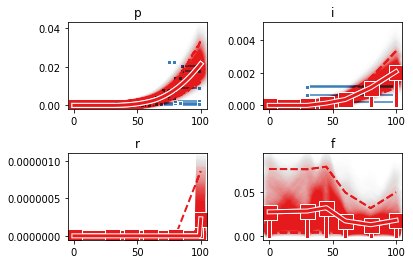

In [8]:
models['p, i, r, smr'] = model
model.plot()

In [9]:
models

{'p, i, r, smr': <dismod_mr.data.ModelData at 0x2b8e00ebda90>}

# Consistent fit without incidence

Now let's do it again with the incidence removed.  Since there is data on prevalence and SMR as well as the assumption that remission is zero, this counts as three data types, the minimum allowed for DisMod-II.

In [12]:
model = dismod_mr.load('pd_sim_data/')
model.keep(areas=['GBR'], sexes=['female', 'total'])

model.input_data = model.input_data[model.input_data.data_type != 'i']
print('kept %d rows' % len(model.input_data.index))

kept 43 rows of data
kept 39 rows


/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/data.py:596: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  d.output_template = pd.DataFrame.from_csv(path + '/output_template.csv')
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/data.py:292: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  self.input_data = self.input_data.select(relevant_row)
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/data.py:295: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  self.input_data = self.input_data.select(lambda i: self.input_data['sex'][i] in sexes)
/ihme/homes/abie/projects/2019/dismod_mr/dismod_mr/data.py:297: FutureWarning: 'select' is deprecated and will be

In [ ]:
model.setup_model()
%time model.fit(iter=iter, burn=burn, thin=thin)

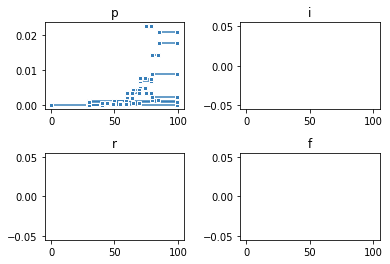

In [13]:
models['p, r, smr'] = model
model.plot()

# Consistent fit without incidence or mortality

This uses only prevalence data and the assumption that there is no remission, so it is not valid in DisMod-II.  The Bayesian priors included by default in DisMod-MR make it possible, but the tradeoff between incidence and mortality is not informed by any data in this case.

In [14]:
model = dismod_mr.load('pd_sim_data/')
model.keep(areas=['GBR'], sexes=['female', 'total'])

model.input_data = model.input_data[model.input_data.data_type == 'p']
print('kept %d rows' % len(model.input_data.index))

kept 43 rows of data
kept 36 rows


In [ ]:
model.setup_model()
%time model.fit(iter=iter, burn=burn, thin=thin)

In [15]:
# the above took 20 minutes in 2013

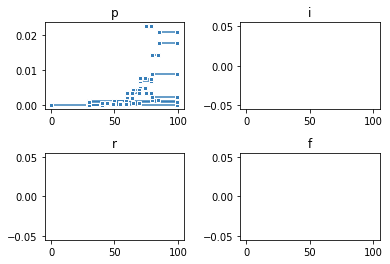

In [16]:
models['p, r'] = model
model.plot()

# Consistent fit with only prevalence

Now without assumption of zero remission, DisMod-MR is going for a very underconstrained problem, and relies on the priors heavily.  However, the prevalence data is there, so the estimates of prevalence will not be changed much.

In [17]:
model = dismod_mr.load('pd_sim_data/')
model.keep(areas=['GBR'], sexes=['female', 'total'])

model.input_data = model.input_data[model.input_data.data_type == 'p']
print('kept %d rows' % len(model.input_data.index))

model.set_level_bounds('r', 0., 1.)
model.set_level_value('r', age_before=0., age_after=101., value=0)

kept 43 rows of data
kept 36 rows


In [ ]:
model.setup_model()
%time model.fit(iter=iter, burn=burn, thin=thin)

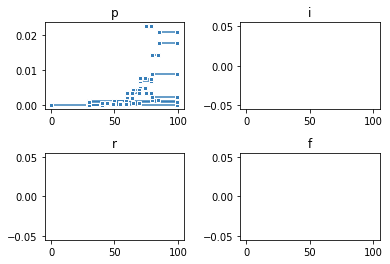

In [18]:
models['p'] = model
model.plot()

# Comparison of alternative models

Let's compare the distributions for all of these now.  You can see that the more data there is, the more concentrated the posterior distribution becomes.

KeyError: 'p'

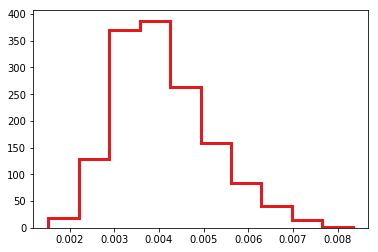

In [19]:
for i, (label, model) in enumerate(models.items()):
    plt.hist(model.vars['p']['mu_age'].trace().mean(1), density=True, histtype='step',
         color=dismod_mr.plot.colors[i%4], linewidth=3, linestyle=['solid','dashed'][i//4],
         label=label)
plt.legend(loc=(1.1,.1))
plt.title('Posterior Distribution Comparison\nCrude Prevalence');

KeyError: 'i'

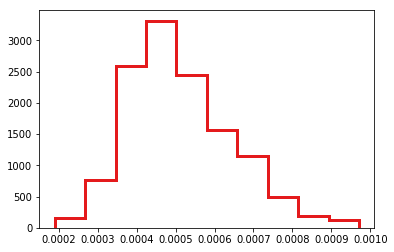

In [21]:
for i, (label, model) in enumerate(models.items()):
    plt.hist(model.vars['i']['mu_age'].trace().mean(1), density=True, histtype='step',
         color=dismod_mr.plot.colors[i%4], linewidth=3, linestyle=['solid','dashed'][i//4],
         label=label)
legend(loc=(1.1,.1)),
title('Posterior Distribution Comparison\nCrude Incidence');

# Consistent fit without prevalence

The really challenging case is without any prevalence data. DisMod-MR will go for it, but there will be a lot of uncertainty.

In [22]:
model = dismod_mr.load('pd_sim_data/')
model.keep(areas=['GBR'], sexes=['female', 'total'])

model.input_data = model.input_data[model.input_data.data_type != 'p']
print('kept %d rows' % len(model.input_data.index))

model.setup_model()

kept 43 rows of data
kept 7 rows
using stored FE for beta_i_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_f_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
u

In [ ]:
%time model.fit(iter=iter, burn=burn, thin=thin)

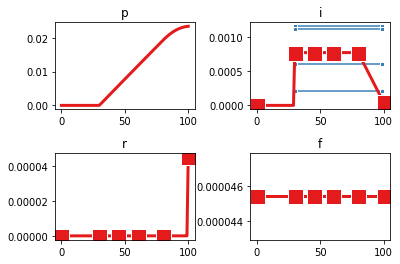

In [23]:
models['i, r, smr'] = model
model.plot()

# Consistent fit with incidence only

DisMod-MR it will even go for it with _only_ incidence.  But that is not ideal...

In [24]:
model = dismod_mr.load('pd_sim_data/')
model.keep(areas=['GBR'], sexes=['female', 'total'])

model.input_data = model.input_data[model.input_data.data_type == 'i']
print('kept %d rows' % len(model.input_data.index))
model.set_level_bounds('r', 0., 1.)

model.setup_model()

kept 43 rows of data
kept 4 rows
using stored FE for beta_i_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_f_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
u

In [25]:
%time model.fit(iter=iter, burn=burn, thin=thin)

fitting submodels
Initial condition calculation interrupted
finding step covariances
Error that often happens with little data
float division by zero


LinAlgError: Singular matrix

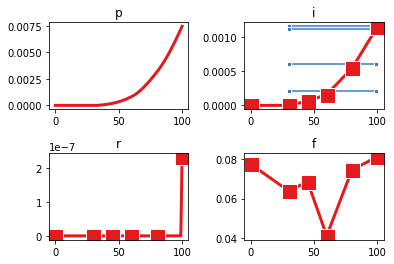

In [26]:
models['i'] = model
model.plot()

# Consistent fit without prevalence or incidence

DisMod-MR is not magic, however.  Without prevalence _or_ incidence, it will not know how much PD there is!

In [27]:
model = dismod_mr.load('pd_sim_data/')
model.keep(areas=['GBR'], sexes=['female', 'total'])

model.input_data = model.input_data[model.input_data.data_type == 'smr']
print('kept %d rows' % len(model.input_data.index))

model.setup_model()

kept 43 rows of data
kept 3 rows
using stored FE for beta_i_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_f_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
u

In [ ]:
%time model.fit(iter=iter, burn=burn, thin=thin)

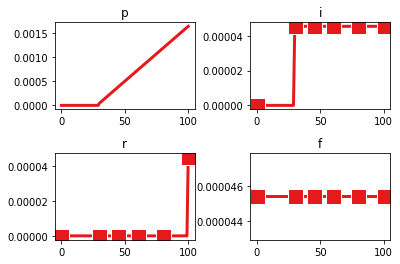

In [28]:
models['r, smr'] = model
model.plot()

In [29]:
for i, label in enumerate(['p', 'i, r, smr', 'i', 'r, smr']):
    plt.hist(models[label].vars['p']['mu_age'].trace().mean(1), density=False, histtype='step',
         color=dismod_mr.plot.colors[i%4], linewidth=3, linestyle=['solid','dashed'][i//4],
         label=label)
legend(loc=(1.1,.1))
title('Posterior Distribution Comparison\nCrude Prevalence')
axis(xmin=-.001);

KeyError: 'p'

In [30]:
!date

Fri Jun 14 10:58:04 PDT 2019
